### Lab-6 : Self-Practice

In this week self practice, you will apply [SVC](https://scikit-learn.org/stable/modules/generated/sklearn.svm.SVC.html) on multi-class problem. In the following 3-class generated blobs you will train SVCs in a one-vs-one and one-vs-rest approach. Draw the decision bounderies of each approach.

#### Question: Recall what the difference between one-vs-one and on-vs-rest for multiclass classification is. 

ANSWER:
* one-vs-all approach considers $n$ models where the $i$-th model is trained on a version of the dataset such that the $i$-th the class is assigned $1$ and the rest of the classes $0$. In other words, the $i$-th model is trained to classify $i$-th class or not $i$-th class. The final prediction depends on the method: either the class with the highest vote.
* one-vs-all approach consider $C_{n}^{2}$ models, where each model is trained to distinguish between different classes. The final prediction is the class with majority votes.

In [30]:
from sklearn.datasets import make_blobs 
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns
sns.set_context()

In [31]:
# we create the dataset
X, y = make_blobs(n_samples=1500, centers=3, n_features=2, cluster_std=0.60,
                  random_state=0)
print(X.shape)

(1500, 2)


In [32]:
data = pd.DataFrame(data=np.concatenate([X, y.reshape(-1, 1)], axis=1), columns=['x1', 'x2', 'y'])

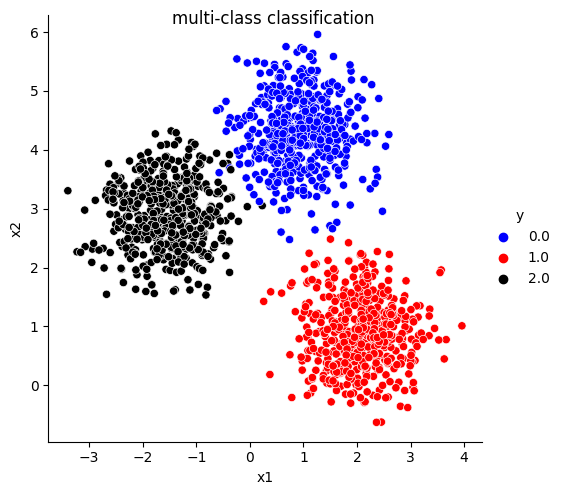

In [33]:
g = sns.relplot(kind='scatter', data=data, x='x1', y='x2', hue='y', palette=['blue', 'red', 'black'])
g.fig.suptitle("multi-class classification")
g.set(xlabel='x1', ylabel='x2')
plt.show()
# plt.scatter(X[:, 0], X[:, 1],  marker=".", s=10)

### Create a svc model to classify the data point using one-vs-one approach and draw the desicion bounderies (hyperplan and margins)

In [34]:
from sklearn.svm import SVC
svc = SVC(decision_function_shape='ovo')
svc.fit(X, y)

SVC(decision_function_shape='ovo')

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


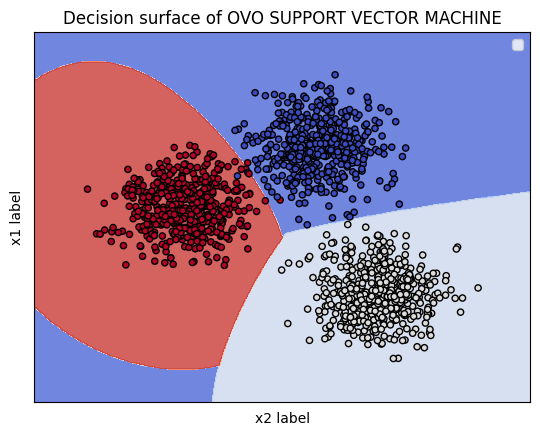

In [35]:
from sklearn.svm import SVC
import numpy as np
import matplotlib.pyplot as plt
from sklearn import svm, datasets

def make_meshgrid(x, y, h=.02):
    x_min, x_max = x.min() - 1, x.max() + 1
    y_min, y_max = y.min() - 1, y.max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
    return xx, yy

def plot_contours(ax, clf, xx, yy, **params):
    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    out = ax.contourf(xx, yy, Z, **params)
    return out

model = svm.SVC(decision_function_shape='ovo')
clf = model.fit(X, y)

fig, ax = plt.subplots()
# title for the plots
title = ('Decision surface of OVO SUPPORT VECTOR MACHINE')
# Set-up grid for plotting.
X0, X1 = X[:, 0], X[:, 1]
xx, yy = make_meshgrid(X0, X1)

plot_contours(ax, clf, xx, yy, cmap=plt.cm.coolwarm, alpha=0.8)
ax.scatter(X0, X1, c=y, cmap=plt.cm.coolwarm, s=20, edgecolors='k')
ax.set_ylabel('x1 label')
ax.set_xlabel('x2 label')
ax.set_xticks(())
ax.set_yticks(())
ax.set_title(title)
ax.legend()
plt.show()

### Create a svc model to classify the data points using one-vs-rest approach and draw the desicion bounderies

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


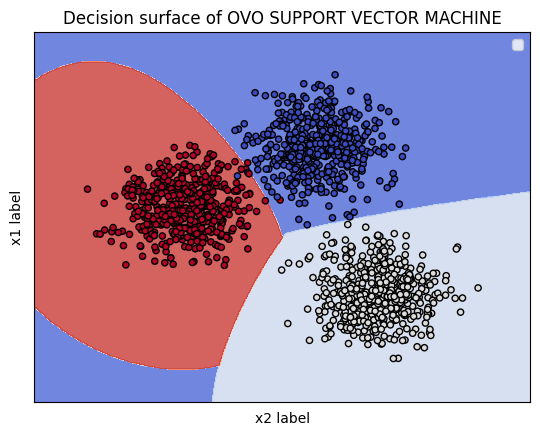

In [36]:
# Your code here
model = svm.SVC(decision_function_shape='ovr')
clf = model.fit(X, y)

fig, ax = plt.subplots()
# title for the plots
title = ('Decision surface of OVO SUPPORT VECTOR MACHINE')
# Set-up grid for plotting.
X0, X1 = X[:, 0], X[:, 1]
xx, yy = make_meshgrid(X0, X1)

plot_contours(ax, clf, xx, yy, cmap=plt.cm.coolwarm, alpha=0.8)
ax.scatter(X0, X1, c=y, cmap=plt.cm.coolwarm, s=20, edgecolors='k')
ax.set_ylabel('x1 label')
ax.set_xlabel('x2 label')
ax.set_xticks(())
ax.set_yticks(())
ax.set_title(title)
ax.legend()
plt.show()

### Using 5-fold cross validation compare the accuracies of each method

In [38]:
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import GridSearchCV

CV = StratifiedKFold(n_splits=5, shuffle=True, random_state=11)
svc = SVC()
params = {"decision_function_shape":['ovr', 'ovo']}
SVC_searcher = GridSearchCV(svc, params, cv=CV, scoring='accuracy')
SVC_searcher.fit(X, y)
print(SVC_searcher.cv_results_['mean_test_score'])
# we can see that both methods performed exactly the same.

[0.99533333 0.99533333]
